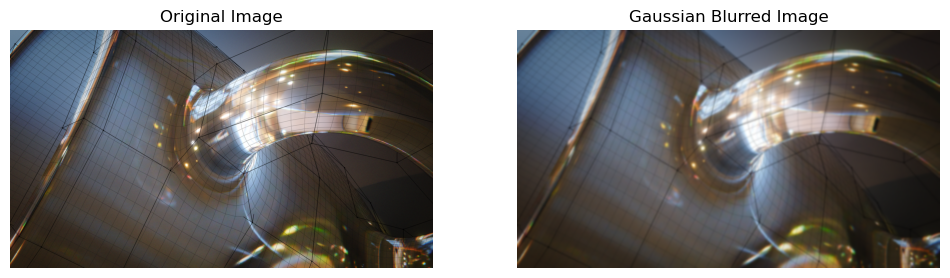

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\sanja\OneDrive\Desktop\module 2\image1.png")

# Convert BGR to RGB for display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur
# The kernel size is set to (15, 15), which controls the blur intensity
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Convert the blurred image to RGB
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Display the original and blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_rgb)
plt.title("Gaussian Blurred Image")
plt.axis('off')

plt.show()


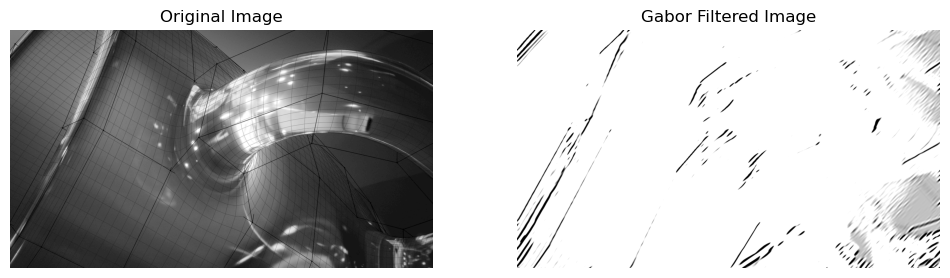

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread(r"C:\Users\sanja\OneDrive\Desktop\module 2\image1.png", cv2.IMREAD_GRAYSCALE)

# Define Gabor filter parameters
ksize = 31  # Size of the filter
sigma = 4.0  # Standard deviation of the Gaussian function
theta = np.pi / 4  # Orientation of the filter (in radians)
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create Gabor kernel (filter)
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# Apply the Gabor filter to the image
filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Gabor Filtered Image")
plt.axis('off')

plt.show()


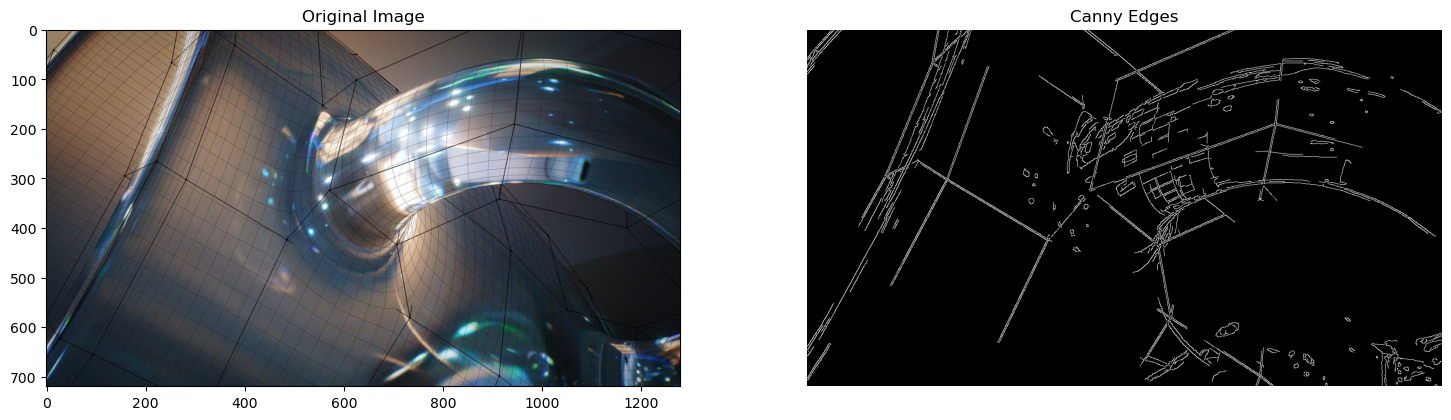

In [8]:
import cv2
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread(r"C:\Users\sanja\OneDrive\Desktop\module 2\image1.png")

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Display the original image and the edges
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')


plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

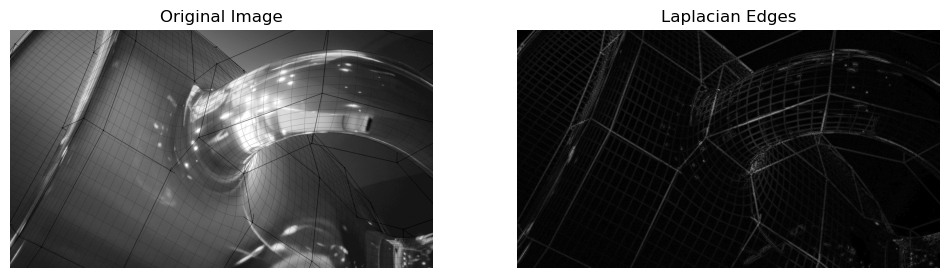

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread(r"C:\Users\sanja\OneDrive\Desktop\module 2\image1.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise (optional but recommended)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Laplacian edge detection
laplacian_edges = cv2.Laplacian(blurred, cv2.CV_64F)

# Convert the result to an 8-bit image
laplacian_edges = cv2.convertScaleAbs(laplacian_edges)

# Display the original and Laplacian edge-detected images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edges')
plt.axis('off')

plt.show()


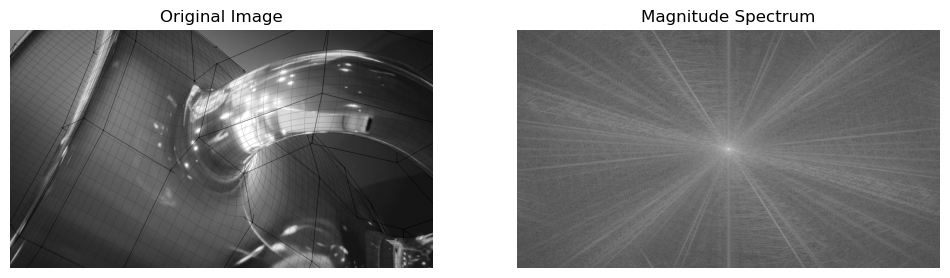

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread(r"C:\Users\sanja\OneDrive\Desktop\module 2\image1.png", cv2.IMREAD_GRAYSCALE)

# Perform DFT (Discrete Fourier Transform) and shift the zero frequency component to the center
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Display the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.show()


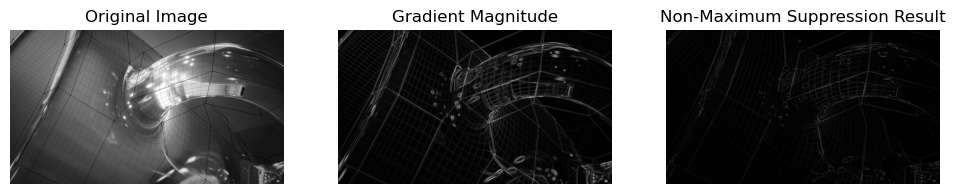

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in grayscale
image = cv2.imread(r"C:\Users\sanja\OneDrive\Desktop\module 2\image1.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Perform Sobel edge detection to get gradient magnitude and direction
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(grad_x**2 + grad_y**2)
angle = np.arctan2(grad_y, grad_x) * (180 / np.pi)  # Convert to degrees

# Non-Maximum Suppression
nms = np.zeros_like(magnitude, dtype=np.uint8)
angle[angle < 0] += 180  # Convert angles to be within [0, 180]

for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        try:
            q = 255
            r = 255
            # Angle 0
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            # Angle 45
            elif 22.5 <= angle[i, j] < 67.5:
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            # Angle 90
            elif 67.5 <= angle[i, j] < 112.5:
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            # Angle 135
            elif 112.5 <= angle[i, j] < 157.5:
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]

            # Suppress non-maximum pixels
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                nms[i, j] = magnitude[i, j]
            else:
                nms[i, j] = 0

        except IndexError as e:
            pass

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nms, cmap='gray')
plt.title("Non-Maximum Suppression Result")
plt.axis('off')

plt.show()
